In [1]:
!pip uninstall yfinance

Found existing installation: yfinance 0.2.57
Uninstalling yfinance-0.2.57:
  Would remove:
    /usr/local/bin/sample
    /usr/local/lib/python3.11/dist-packages/yfinance-0.2.57.dist-info/*
    /usr/local/lib/python3.11/dist-packages/yfinance/*
Proceed (Y/n)? Y
  Successfully uninstalled yfinance-0.2.57


In [2]:
!pip install yfinance --upgrade --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 64.3 MB/s eta 0:00:00


In [16]:
# pip install yfinance[nospam]

In [3]:
!pip install --upgrade yahooquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 48.4 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 5.4.0
    Uninstalling lxml-5.4.0:
      Successfully uninstalled lxml-5.4.0


In [4]:
# !pip install --upgrade yfinance==0.2.54

In [4]:
# !pip install curl_cffi
!pip install curl_cffi

In [5]:
import requests
from bs4 import BeautifulSoup
import os
import yfinance as yf
from yahooquery import Ticker
import pandas as pd
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta
from io import StringIO
import matplotlib.pyplot as plt
from itertools import combinations
from statsmodels.tsa.stattools import coint
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import torch
import seaborn as sns

In [6]:
url = "https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"
tables = pd.read_html(url, flavor='bs4')
print(f"totally find  {len(tables)} tables")
print(tables[2].head())

totally find  22 tables
            Company Exchange Symbol                Industry  Date added  \
0                3M     NYSE    MMM            Conglomerate  1976-08-09   
1  American Express     NYSE    AXP      Financial services  1982-08-30   
2             Amgen   NASDAQ   AMGN       Biopharmaceutical  2020-08-31   
3            Amazon   NASDAQ   AMZN               Retailing  2024-02-26   
4             Apple   NASDAQ   AAPL  Information technology  2015-03-19   

                                   Notes Index weighting  
0  As Minnesota Mining and Manufacturing           2.11%  
1                                    NaN           4.37%  
2                                    NaN           3.89%  
3                                    NaN           3.21%  
4                                    NaN           3.25%  


In [7]:
constituent_stocks = tables[2]
DJI_df = constituent_stocks
DJI_df.head()

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,2.11%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,4.37%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,3.89%
3,Amazon,NASDAQ,AMZN,Retailing,2024-02-26,NaN,3.21%
4,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.25%


In [8]:
symbols = DJI_df.Symbol.values.tolist()
symbols

['MMM',
 'AXP',
 'AMGN',
 'AMZN',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DIS',
 'GS',
 'HD',
 'HON',
 'IBM',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'NVDA',
 'PG',
 'CRM',
 'SHW',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WMT']

In [48]:
# from curl_cffi import requests
# session = requests.Session(impersonate="chrome")
# df = yf.download(
#         symbols,
#         session=session,
#         start='2023-01-01',
#         end='2025-03-31',
#         group_by='symbol',
#         auto_adjust=True
#     )

In [49]:
# from curl_cffi import requests
# session = requests.Session(impersonate="chrome")
# df = yf.download(symbols, session=session, start='2023-01-01', end='2025-03-31',)['Close']
# df.head()

In [58]:
# df_ticker = pd.DataFrame()

# for symbol in symbols:
#     data = yf.download(symbol, start='2023-01-01', end='2025-03-31', progress=False, auto_adjust=True)

#     # solve MultiIndex
#     if isinstance(data.columns, pd.MultiIndex):
#         data.columns = data.columns.get_level_values(0)

#     if not data.empty:
#         data["Symbol"] = symbol
#         df_ticker = pd.concat([df_ticker, data])

# df_ticker.reset_index(inplace=True)
# df_ticker.dropna(inplace=True)

# df_ticker.to_csv("dji_stocks.csv", index=False)
# print("Data saved to dji_stocks.csv")
# print(df_ticker.head())

In [9]:
from curl_cffi import requests
session = requests.Session(impersonate="chrome")

df_ticker = pd.DataFrame()

for symbol in symbols:
    data = yf.download(symbol, session=session, start='2023-01-01', end='2025-03-31', progress=False, auto_adjust=True)

    # solve MultiIndex
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)

    if not data.empty:
        data["Symbol"] = symbol
        df_ticker = pd.concat([df_ticker, data])

df_ticker.reset_index(inplace=True)
df_ticker.dropna(inplace=True)

df_ticker.to_csv("dji_stocks.csv", index=False)
print("Data saved to dji_stocks.csv")
print(df_ticker.head())

Data saved to dji_stocks.csv
Price       Date      Close       High        Low       Open   Volume Symbol
0     2023-01-03  92.868965  92.997879  91.276537  92.148583  3124909    MMM
1     2023-01-04  94.901207  95.007370  93.050959  93.536271  3312561    MMM
2     2023-01-05  93.240524  94.461386  92.861374  94.188399  3117494    MMM
3     2023-01-06  96.091743  96.402648  93.839594  94.529642  2890732    MMM
4     2023-01-09  96.144814  98.169477  95.629174  96.304061  3434075    MMM


In [10]:
stock_pairs = list(combinations(symbols, 2))


print(stock_pairs[:5])


print(f"Total pairs: {len(stock_pairs)}")

[('MMM', 'AXP'), ('MMM', 'AMGN'), ('MMM', 'AMZN'), ('MMM', 'AAPL'), ('MMM', 'BA')]
Total pairs: 435


In [11]:
dji_df_pivot = df_ticker.pivot(index='Date', columns='Symbol', values='Close')

In [21]:
dji_df_pivot

Symbol,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,NVDA_PG_spread,AAPL_HON_spread,HON_NVDA_spread,HON_WMT_spread,HON_JPM_spread,AXP_HON_spread,JNJ_MCD_spread,GS_HON_spread,GS_WMT_spread,AMZN_PG_spread
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,123.632523,243.500778,85.820000,142.451492,195.389999,228.451050,133.821106,44.446243,158.737137,87.884308,...,-2.298605,-0.501755,2.658580,1.480445,0.477169,-0.360068,-0.411294,0.467922,1.948366,-0.506842
2023-01-04,124.907707,246.050766,85.139999,145.762985,203.639999,230.822830,138.596893,44.436893,157.049316,90.857582,...,-2.273083,-0.471415,2.608634,1.459252,0.447809,-0.317008,-0.400692,0.492266,1.951518,-0.519142
2023-01-05,123.583092,248.349380,83.120003,142.274841,204.990005,229.789948,135.369995,43.810768,159.877563,90.798302,...,-2.293956,-0.455200,2.615124,1.435790,0.421153,-0.314353,-0.399633,0.507747,1.943536,-0.530661
2023-01-06,128.130203,256.110931,86.080002,145.908707,213.000000,237.995377,139.510330,45.156490,161.081833,92.773903,...,-2.276693,-0.447038,2.602298,1.439557,0.430170,-0.317103,-0.419058,0.492264,1.931821,-0.519203
2023-01-09,128.654144,251.383270,87.360001,146.132202,208.570007,235.853165,146.053467,45.399467,159.822830,93.613525,...,-2.213945,-0.444858,2.553740,1.454003,0.436211,-0.317474,-0.437036,0.504399,1.958403,-0.492153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,220.729996,314.380005,203.259995,276.940582,180.899994,340.032776,285.511383,60.565639,165.020004,100.180000,...,-0.304490,0.041062,0.556705,0.884354,-0.151652,0.267924,-0.626978,1.007322,1.891676,0.210823
2025-03-25,223.750000,306.859985,205.710007,278.355896,182.589996,340.978210,288.157227,60.585506,165.940002,101.610001,...,-0.293390,0.053377,0.563927,0.917328,-0.162678,0.271748,-0.645059,1.016065,1.933394,0.239852
2025-03-26,221.529999,305.709991,201.130005,275.086761,178.550003,339.475433,280.549164,61.390133,167.970001,100.779999,...,-0.375171,0.038703,0.627764,0.916737,-0.157576,0.255231,-0.662188,0.990635,1.907371,0.194690


In [12]:
threshold = 0.05

In [13]:
cointegrated_pairs = []
for pair in stock_pairs:
    dji_df2 = dji_df_pivot[list(pair)]
    score, pvalue, _ = coint(dji_df2.values[:, 0], dji_df2.values[:, 1])
    if pvalue < threshold:
        cointegrated_pairs.append((pair, pvalue))

# Sort by p-value from small to large
cointegrated_pairs_sorted = sorted(cointegrated_pairs, key=lambda x: x[1])

# Select the top 10 strongest cointegrated pairs
top_10_pairs = cointegrated_pairs_sorted[:10]

print("The top 10 most significant cointegrated stock pairs (with the smallest p-value)：")
for pair, pval in top_10_pairs:
    print(f"{pair}: p-value = {pval:.4f}")

The top 10 most significant cointegrated stock pairs (with the smallest p-value)：
('NVDA', 'PG'): p-value = 0.0006
('AAPL', 'HON'): p-value = 0.0021
('HON', 'NVDA'): p-value = 0.0063
('HON', 'WMT'): p-value = 0.0078
('HON', 'JPM'): p-value = 0.0084
('AXP', 'HON'): p-value = 0.0099
('JNJ', 'MCD'): p-value = 0.0102
('GS', 'HON'): p-value = 0.0158
('GS', 'WMT'): p-value = 0.0180
('AMZN', 'PG'): p-value = 0.0191


In [14]:
# Save as DataFrame
df_top10_coint = pd.DataFrame(top_10_pairs, columns=["Pair", "p-value"])
df_top10_coint.to_csv("top10_cointegrated_pairs.csv", index=False)

In [15]:
df_top10_coint

,Pair,p-value
0,"(NVDA, PG)",0.000554
1,"(AAPL, HON)",0.002108
2,"(HON, NVDA)",0.006321
3,"(HON, WMT)",0.007763
4,"(HON, JPM)",0.008378
5,"(AXP, HON)",0.009876
6,"(JNJ, MCD)",0.010222
7,"(GS, HON)",0.015763
8,"(GS, WMT)",0.017966
9,"(AMZN, PG)",0.019135


In [16]:
spreads = {}

for pair, _ in top_10_pairs:
    stock1, stock2 = pair
    price1 = np.log(dji_df_pivot[stock1])
    price2 = np.log(dji_df_pivot[stock2])
    spread = price1 - price2
    spreads[pair] = spread

    #  Merge the spread into a DataFrame for easier analysis or plotting
    dji_df_pivot[f"{stock1}_{stock2}_spread"] = spread

    print(f"Spread for {stock1} and {stock2} calculated.")

Spread for NVDA and PG calculated.
Spread for AAPL and HON calculated.
Spread for HON and NVDA calculated.
Spread for HON and WMT calculated.
Spread for HON and JPM calculated.
Spread for AXP and HON calculated.
Spread for JNJ and MCD calculated.
Spread for GS and HON calculated.
Spread for GS and WMT calculated.
Spread for AMZN and PG calculated.


In [23]:
# fig, ax = plt.subplots(figsize=(20, 10))
# sns.heatmap(dji_df_pivot.corr(), annot=True)

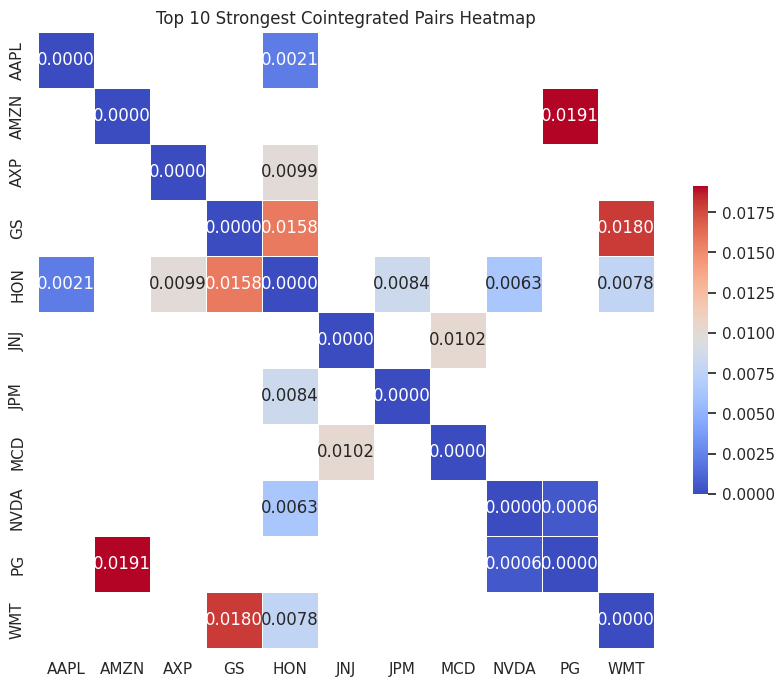

In [25]:
symbols_in_pairs = set()
for pair, _ in top_10_pairs:
    symbols_in_pairs.update(pair)
symbols_in_pairs = sorted(symbols_in_pairs)


pvalue_matrix = pd.DataFrame(np.nan, index=symbols_in_pairs, columns=symbols_in_pairs)

for (sym1, sym2), pval in top_10_pairs:
    pvalue_matrix.loc[sym1, sym2] = pval
    pvalue_matrix.loc[sym2, sym1] = pval

np.fill_diagonal(pvalue_matrix.values, 0)

sns.set(style="white")

plt.figure(figsize=(10, 8))

sns.heatmap(pvalue_matrix,
            annot=True,
            fmt=".4f",
            cmap="coolwarm",
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            mask=pvalue_matrix.isnull())

plt.title("Top 10 Strongest Cointegrated Pairs Heatmap")

plt.show()

# Visualization

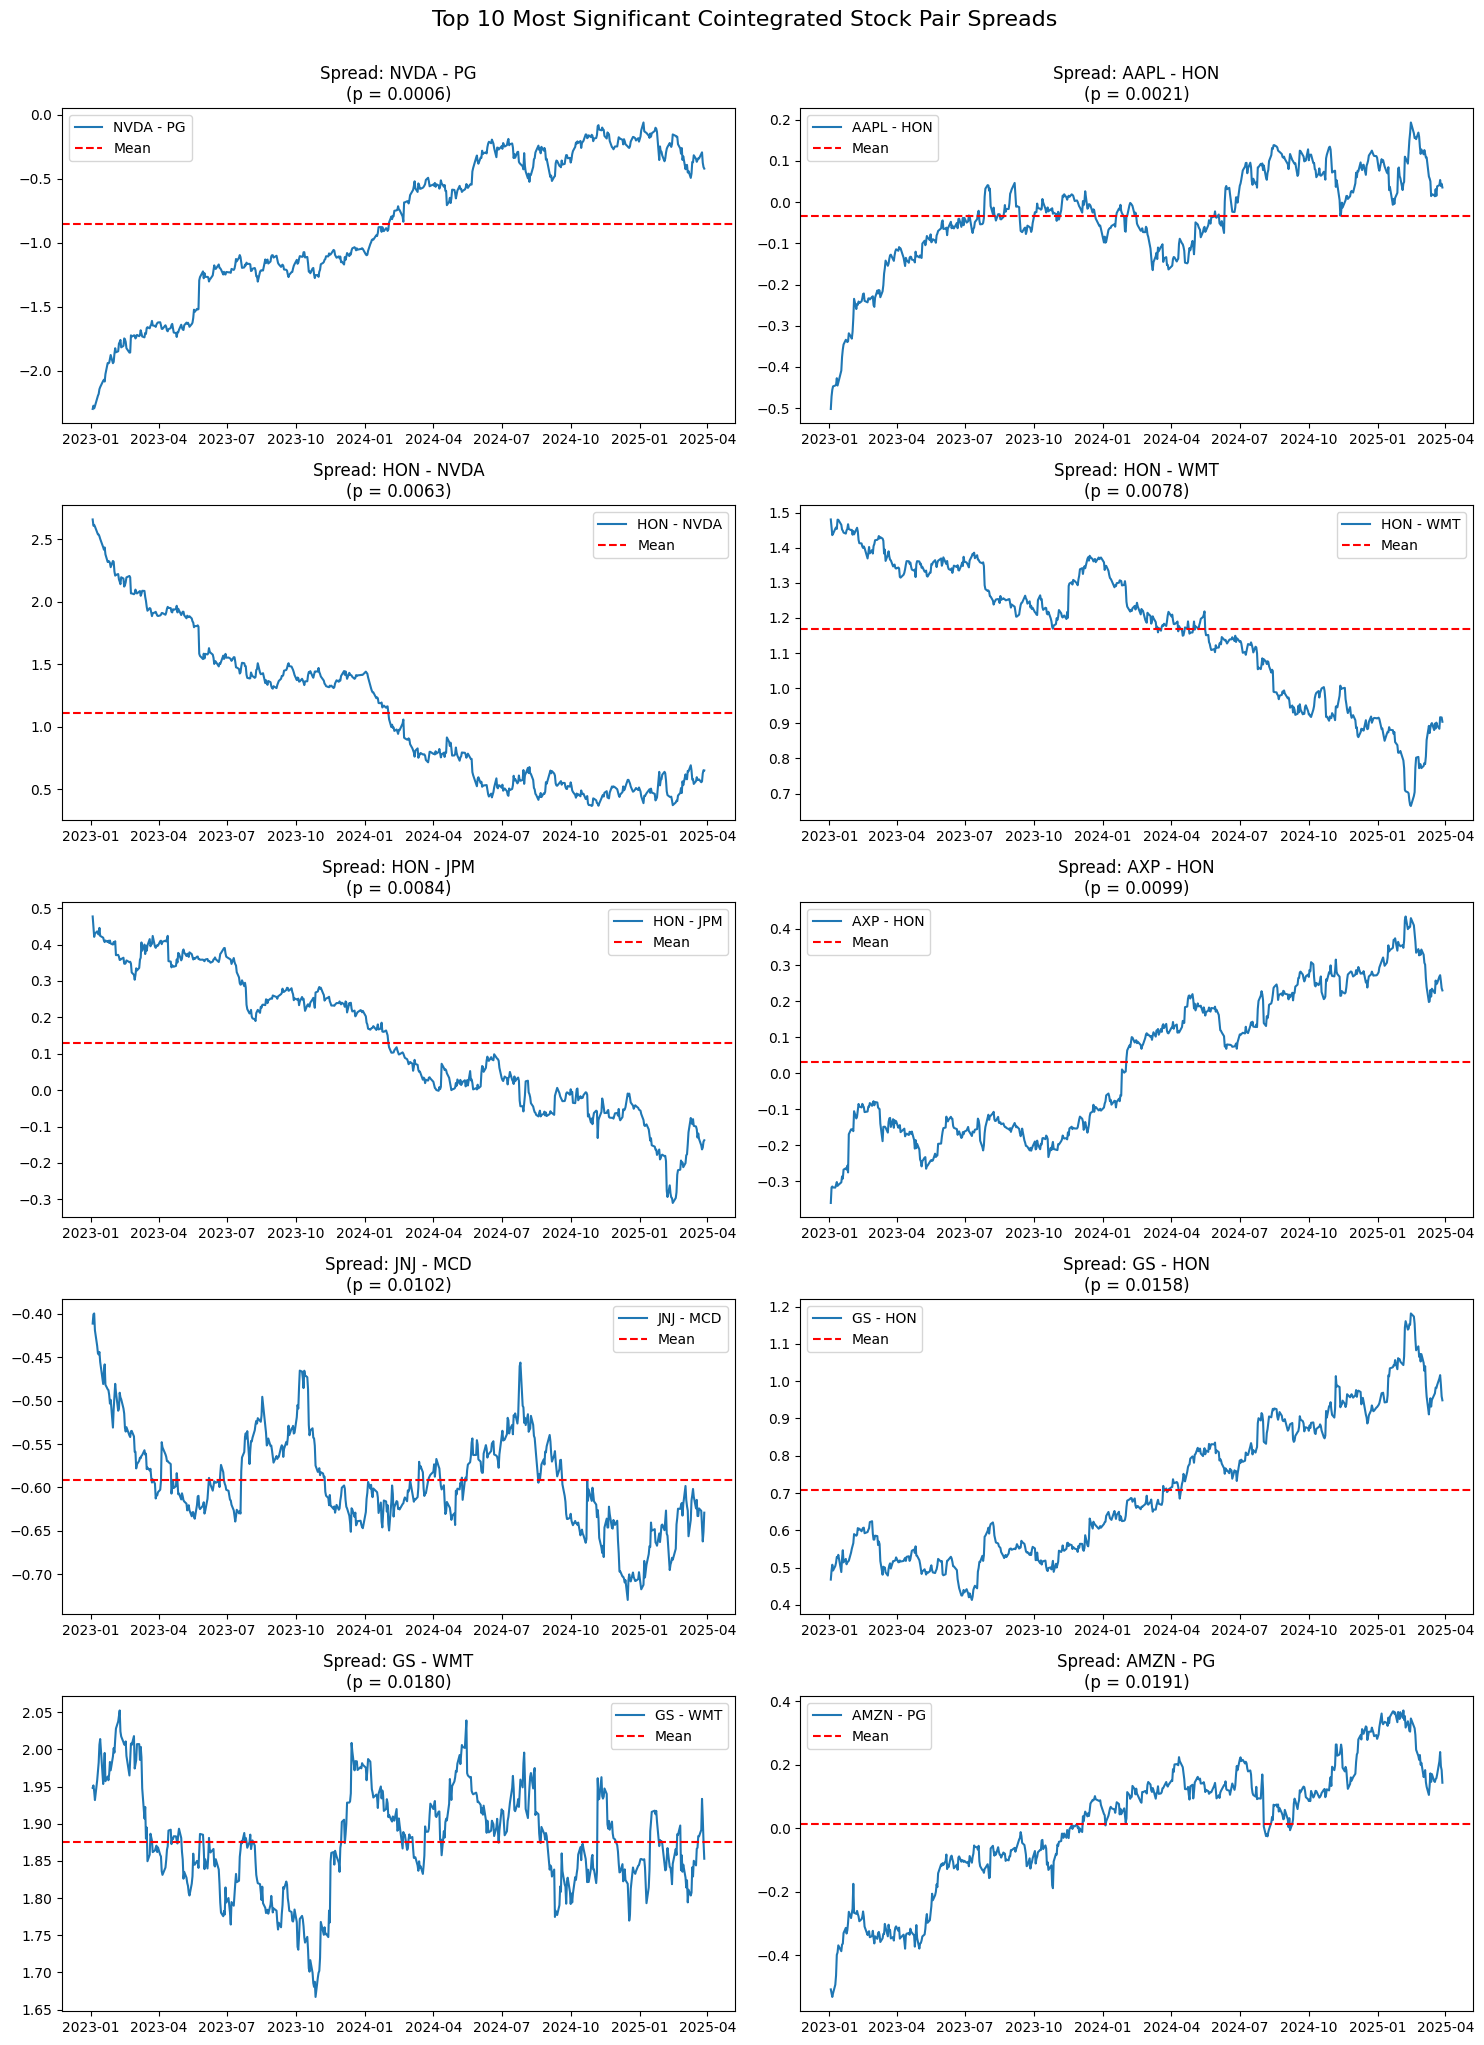

In [17]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, (pair, pval) in enumerate(top_10_pairs):
    stock1, stock2 = pair
    spread = spreads[pair]

    axes[i].plot(spread.index, spread, label=f"{stock1} - {stock2}")
    axes[i].set_title(f"Spread: {stock1} - {stock2}\n(p = {pval:.4f})", fontsize=12)
    axes[i].axhline(spread.mean(), color='red', linestyle='--', label='Mean')
    axes[i].legend()

plt.tight_layout()
plt.suptitle("Top 10 Most Significant Cointegrated Stock Pair Spreads", fontsize=16, y=1.02)
plt.show()

In [ ]:
# sample_pair = top_10_pairs[0][0]
# spread_series = spreads[sample_pair]

# plt.figure(figsize=(10, 4))
# plt.plot(spread_series)
# plt.title(f"Spread of log prices: {sample_pair[0]} - {sample_pair[1]}")
# plt.xlabel("Date")
# plt.ylabel("Log Spread")
# plt.grid(True)
# plt.show()

#I.  Support Vector Machine (SVM)


In [ ]:
# Pairs Trading Using SVM


# Feature engineering

In [20]:
features_dict = {}

for pair, _ in top_10_pairs:
    stock1, stock2 = pair

    # Take the logarithm of the price
    log_price1 = np.log(dji_df_pivot[stock1])
    log_price2 = np.log(dji_df_pivot[stock2])
    spread = log_price1 - log_price2

    # Feature construction
    asset1_returns = log_price1.diff()
    asset2_returns = log_price2.diff()
    spread_ma5 = spread.rolling(5).mean()
    asset1_volatility = asset1_returns.rolling(20).std()
    asset2_volatility = asset2_returns.rolling(20).std()

    # Merge into DataFrame
    X = pd.DataFrame({
        'Asset1Returns': asset1_returns,
        'Asset2Returns': asset2_returns,
        'SpreadMA5': spread_ma5,
        'Asset1Volatility': asset1_volatility,
        'Asset2Volatility': asset2_volatility
    }).fillna(0)

    y = spread.fillna(0)

    features_dict[pair] = (X, y)

    print(f"Features for pair {stock1}-{stock2} created.")

Features for pair NVDA-PG created.
Features for pair AAPL-HON created.
Features for pair HON-NVDA created.
Features for pair HON-WMT created.
Features for pair HON-JPM created.
Features for pair AXP-HON created.
Features for pair JNJ-MCD created.
Features for pair GS-HON created.
Features for pair GS-WMT created.
Features for pair AMZN-PG created.


In [21]:
first_pair = top_10_pairs[0][0]
X_sample, y_sample = features_dict[first_pair]

print(X_sample.head())
print(y_sample.head())

            Asset1Returns  Asset2Returns  SpreadMA5  Asset1Volatility  \
Date                                                                    
2023-01-03       0.000000       0.000000   0.000000               0.0   
2023-01-04       0.029867       0.004345   0.000000               0.0   
2023-01-05      -0.033366      -0.012493   0.000000               0.0   
2023-01-06       0.040797       0.023534   0.000000               0.0   
2023-01-09       0.050458      -0.012289  -2.271257               0.0   

            Asset2Volatility  
Date                          
2023-01-03               0.0  
2023-01-04               0.0  
2023-01-05               0.0  
2023-01-06               0.0  
2023-01-09               0.0  
Date
2023-01-03   -2.298605
2023-01-04   -2.273083
2023-01-05   -2.293956
2023-01-06   -2.276693
2023-01-09   -2.213945
dtype: float64


In [22]:
train_test_split_dict = {}  # Store the training and test sets for each pair of stocks

for pair in top_10_pairs:
    stock_pair = pair[0]
    X, y = features_dict[stock_pair]

    train_size = int(len(y) * 0.8)
    train_X = X.iloc[:train_size]
    test_X = X.iloc[train_size:]
    train_y = y.iloc[:train_size]
    test_y = y.iloc[train_size:]

    train_test_split_dict[stock_pair] = {
        'train_X': train_X,
        'test_X': test_X,
        'train_y': train_y,
        'test_y': test_y
    }

    print(f"Data split for pair {stock_pair[0]}-{stock_pair[1]} complete.")

Data split for pair NVDA-PG complete.
Data split for pair AAPL-HON complete.
Data split for pair HON-NVDA complete.
Data split for pair HON-WMT complete.
Data split for pair HON-JPM complete.
Data split for pair AXP-HON complete.
Data split for pair JNJ-MCD complete.
Data split for pair GS-HON complete.
Data split for pair GS-WMT complete.
Data split for pair AMZN-PG complete.


In [23]:
test_X.head()

,Asset1Returns,Asset2Returns,SpreadMA5,Asset1Volatility,Asset2Volatility
Date,,,,,
2024-10-15,0.000800,0.006126,0.108108,0.013408,0.008272
2024-10-16,-0.004271,-0.006880,0.106316,0.013434,0.008035
2024-10-17,0.003419,-0.000580,0.103353,0.012771,0.007399
2024-10-18,0.007755,0.000041,0.102139,0.012722,0.006467
2024-10-21,0.000423,-0.010211,0.106065,0.012383,0.006808


# Modeling training

In [ ]:
# Model training and testing using SVM

In [24]:
svm_results = {}

for pair in top_10_pairs:
    stock_pair = pair[0]
    data = train_test_split_dict[stock_pair]

    train_X = data['train_X']
    test_X = data['test_X']
    train_y = data['train_y']
    test_y = data['test_y']

    svm_model = SVR(kernel='linear')
    svm_model.fit(train_X, train_y)

    train_pred = svm_model.predict(train_X)
    test_pred = svm_model.predict(test_X)

    train_rmse = np.sqrt(mean_squared_error(train_y, train_pred))
    test_rmse = np.sqrt(mean_squared_error(test_y, test_pred))

    svm_results[stock_pair] = {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'model': svm_model,
        'test_pred': test_pred
    }

    print(f"{stock_pair}: Train RMSE = {train_rmse:.4f}, Test RMSE = {test_rmse:.4f}")

('NVDA', 'PG'): Train RMSE = 0.2144, Test RMSE = 0.0578
('AAPL', 'HON'): Train RMSE = 0.0608, Test RMSE = 0.0729
('HON', 'NVDA'): Train RMSE = 0.2439, Test RMSE = 0.0556
('HON', 'WMT'): Train RMSE = 0.1091, Test RMSE = 0.1252
('HON', 'JPM'): Train RMSE = 0.0667, Test RMSE = 0.1156
('AXP', 'HON'): Train RMSE = 0.0513, Test RMSE = 0.0881
('JNJ', 'MCD'): Train RMSE = 0.0504, Test RMSE = 0.1037
('GS', 'HON'): Train RMSE = 0.0609, Test RMSE = 0.1206
('GS', 'WMT'): Train RMSE = 0.0726, Test RMSE = 0.0392
('AMZN', 'PG'): Train RMSE = 0.0692, Test RMSE = 0.0961


In [25]:
def score_fn(model, test_X, spread, type="non_neural_net"):
    # predict spread
    if type == "non_neural_net":
        test_pred = model.predict(test_X)
    else:
        test_pred = model(torch.Tensor(test_X.values)).detach().numpy()

    zscore = (spread - test_pred.mean()) / test_pred.std()

    entry_threshold = 2.0
    exit_threshold = 1.0

    stock1_position = pd.Series(data=0, index=zscore.index)
    stock2_position = pd.Series(data=0, index=zscore.index)

    for i in range(1, len(zscore)):
      if zscore.iloc[i] < -entry_threshold and stock1_position.iloc[i-1] == 0:
        stock1_position.iloc[i] = 1
        stock2_position.iloc[i] = -1
      elif zscore.iloc[i] > entry_threshold and stock2_position.iloc[i-1] == 0:
        stock1_position.iloc[i] = -1
        stock2_position.iloc[i] = 1
      elif abs(zscore.iloc[i]) < exit_threshold:
        stock1_position.iloc[i] = 0
        stock2_position.iloc[i] = 0
      else:
        stock1_position.iloc[i] = stock1_position.iloc[i-1]
        stock2_position.iloc[i] = stock2_position.iloc[i-1]


    stock1_returns = (np.exp(test_X['Asset1Returns']) * stock1_position.shift(1)).fillna(0)
    stock2_returns = (np.exp(test_X['Asset2Returns']) * stock2_position.shift(1)).fillna(0)

    total_returns = stock1_returns + stock2_returns
    cumulative_returns = (1 + total_returns).cumprod()

    # return cumulative_returns[-1], cumulative_returns
    return cumulative_returns.iloc[-1], cumulative_returns

In [26]:
svm_strategy_returns = {}

for pair in top_10_pairs:
    stocks = pair[0]
    data = train_test_split_dict[stocks]

    test_X = data['test_X']
    test_y = data['test_y']
    spread = test_y
    model = svm_results[stocks]['model']

    # Get the cumulative returns
    final_value, cum_returns = score_fn(model, test_X, spread, type="non_neural_net")

    n_days = len(cum_returns)

    # Calculate annualized return
    annualized_return = (final_value ** (252 / n_days)) - 1


    annualized_return_percent = annualized_return * 100

    svm_strategy_returns[stocks] = annualized_return_percent

    print(f"{stocks}: Annualized Return = {annualized_return_percent:.2f}%")

('NVDA', 'PG'): Annualized Return = 198.31%
('AAPL', 'HON'): Annualized Return = 68.82%
('HON', 'NVDA'): Annualized Return = 187.60%
('HON', 'WMT'): Annualized Return = 0.11%
('HON', 'JPM'): Annualized Return = 13.00%
('AXP', 'HON'): Annualized Return = 49.93%
('JNJ', 'MCD'): Annualized Return = 1.03%
('GS', 'HON'): Annualized Return = 39.89%
('GS', 'WMT'): Annualized Return = 15.97%
('AMZN', 'PG'): Annualized Return = 15.56%


In [27]:
# Compute the mean annualized return for all 10 pairs
mean_annualized_return = np.mean(list(svm_strategy_returns.values()))
print(f"Mean Annualized Return of the SVM Model for the Top 10 Pairs: {mean_annualized_return:.2f}%")

Mean Annualized Return of the SVM Model for the Top 10 Pairs: 59.02%


# Visualization - SVM

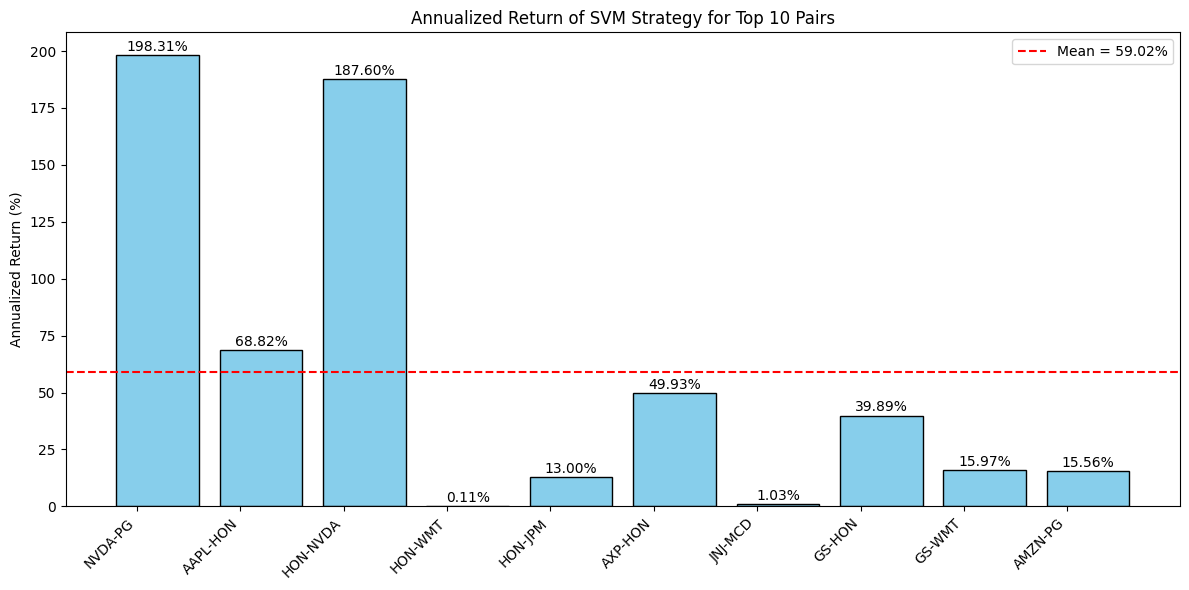

In [28]:
pair_labels = [f"{p[0]}-{p[1]}" for p, _ in top_10_pairs]
returns = list(svm_strategy_returns.values())


x = np.arange(len(pair_labels))

plt.figure(figsize=(12, 6))
bars = plt.bar(x, returns, color='skyblue', edgecolor='black')
plt.axhline(mean_annualized_return, color='red', linestyle='--', label=f'Mean = {mean_annualized_return:.2f}%')


for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.2f}%', ha='center', va='bottom')


plt.xticks(ticks=x - 0.2, labels=pair_labels, rotation=45, ha='right')
plt.title('Annualized Return of SVM Strategy for Top 10 Pairs')
plt.ylabel('Annualized Return (%)')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-29-72440719e7c4>:12: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(cum_returns.index, cum_returns.values, label=stocks)
<ipython-input-29-72440719e7c4>:12: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(cum_returns.index, cum_returns.values, label=stocks)
<ipython-input-29-72440719e7c4>:12: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(cum_returns.index, cum_returns.values, label=stocks)
<ipython-inpu

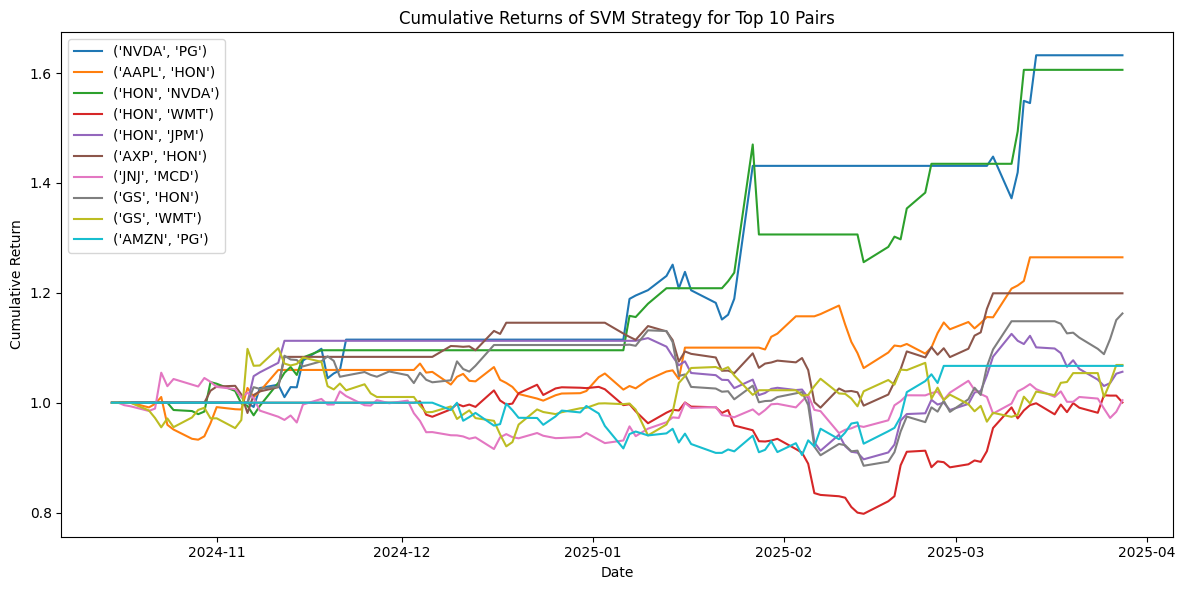

In [29]:
plt.figure(figsize=(12, 6))

for pair in top_10_pairs:
    stocks = pair[0]
    data = train_test_split_dict[stocks]
    test_X = data['test_X']
    test_y = data['test_y']
    spread = test_y
    model = svm_results[stocks]['model']

    _, cum_returns = score_fn(model, test_X, spread, type="non_neural_net")
    plt.plot(cum_returns.index, cum_returns.values, label=stocks)

plt.title('Cumulative Returns of SVM Strategy for Top 10 Pairs')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.tight_layout()
plt.show()

# II. Random Forest

In [ ]:
# Pairs Trading Using Random Forest
# Model training and testing using random forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_strategy_returns = {}

for pair in top_10_pairs:
    stocks = pair[0]
    data = train_test_split_dict[stocks]

    train_X = data['train_X']
    train_y = data['train_y']
    test_X = data['test_X']
    test_y = data['test_y']
    spread = test_y

    # Create and train a random forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(train_X, train_y)

    # output RMSE
    train_pred = rf_model.predict(train_X)
    test_pred = rf_model.predict(test_X)
    print(f"{stocks}:")
    print("  Train RMSE:", np.sqrt(mean_squared_error(train_y, train_pred)))
    print("  Test RMSE :", np.sqrt(mean_squared_error(test_y, test_pred)))


    final_value, cum_returns = score_fn(rf_model, test_X, spread, type="non_neural_net")


    n_days = len(cum_returns)
    annualized_return = (final_value ** (252 / n_days)) - 1
    annualized_return_percent = annualized_return * 100

    rf_strategy_returns[stocks] = annualized_return_percent
    print(f"  Annualized Return: {annualized_return_percent:.2f}%\n")

('NVDA', 'PG'):
  Train RMSE: 0.01169898166337594
  Test RMSE : 0.14651850257197943
  Annualized Return: 0.00%

('AAPL', 'HON'):
  Train RMSE: 0.005472508752794796
  Test RMSE : 0.02163489166622076
  Annualized Return: 35.48%

('HON', 'NVDA'):
  Train RMSE: 0.012159001239344214
  Test RMSE : 0.04331961450026869
  Annualized Return: 190.80%

('HON', 'WMT'):
  Train RMSE: 0.004882888991918481
  Test RMSE : 0.10647501250644964
  Annualized Return: 19.95%

('HON', 'JPM'):
  Train RMSE: 0.004852791606028546
  Test RMSE : 0.09112114870332122
  Annualized Return: 30.08%

('AXP', 'HON'):
  Train RMSE: 0.006250246196535586
  Test RMSE : 0.058616342168883624
  Annualized Return: 69.27%

('JNJ', 'MCD'):
  Train RMSE: 0.004203064288384353
  Test RMSE : 0.034819590747186324
  Annualized Return: 50.15%

('GS', 'HON'):
  Train RMSE: 0.005095748167355961
  Test RMSE : 0.10639490165498268
  Annualized Return: 37.35%

('GS', 'WMT'):
  Train RMSE: 0.0058016587247225575
  Test RMSE : 0.020227993664063804


In [ ]:
# Compute the mean annualized return for all 10 pairs
mean_annualized_return = np.mean(list(rf_strategy_returns.values()))
print(f"Mean Annualized Return of the Random Forest Model for the Top 10 Pairs: {mean_annualized_return:.2f}%")

# Visualization - Random Forest

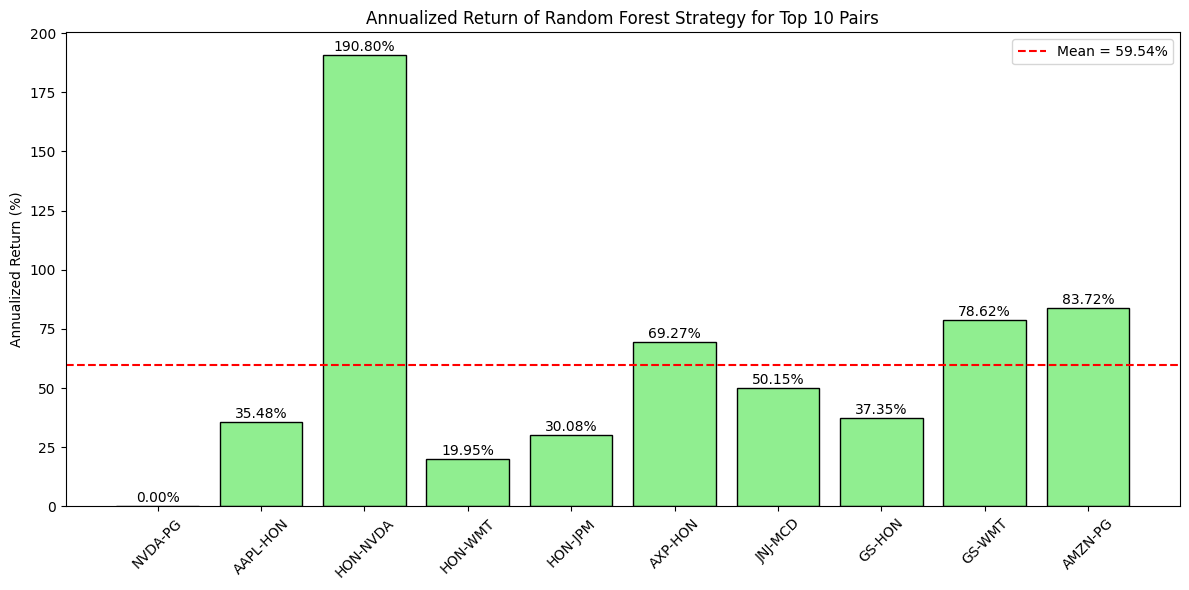

In [31]:
pairs = list(rf_strategy_returns.keys())
returns = list(rf_strategy_returns.values())
pair_labels = [f"{p[0]}-{p[1]}" if isinstance(p, (list, tuple)) else str(p) for p in pairs]


mean_return = np.mean(returns)

plt.figure(figsize=(12, 6))
bars = plt.bar(pair_labels, returns, color='lightgreen', edgecolor='black')
plt.axhline(mean_return, color='red', linestyle='--', label=f'Mean = {mean_return:.2f}%')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}%', ha='center', va='bottom')

plt.title('Annualized Return of Random Forest Strategy for Top 10 Pairs')
plt.ylabel('Annualized Return (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#  III. Neural Network

In [ ]:
# Pairs Trading Using Neural Network
# Model training and testing using Neural Network

In [32]:
# Convert data to PyTorch tensors
train_X_ts = torch.Tensor(train_X.values)
train_y_ts = torch.Tensor(train_y).view(-1, 1)
test_X_ts = torch.Tensor(test_X.values)
test_y_ts = torch.Tensor(test_y).view(-1, 1)

<ipython-input-32-1d13279f6bcf>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_y_ts = torch.Tensor(train_y).view(-1, 1)
<ipython-input-32-1d13279f6bcf>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_y_ts = torch.Tensor(test_y).view(-1, 1)


In [33]:
import torch.nn as nn

# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(train_X.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [34]:
from torchsummary import summary

# Create an instance of the neural network model
nn_model = Net()
# print the summary of the customized neural network
summary(nn_model, input_size=(1, train_X.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]             384
              ReLU-2                [-1, 1, 64]               0
            Linear-3                [-1, 1, 32]           2,080
              ReLU-4                [-1, 1, 32]               0
            Linear-5                 [-1, 1, 1]              33
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [35]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.001)

# Train the model
for epoch in range(100):
    optimizer.zero_grad()
    outputs = nn_model(train_X_ts)
    loss = criterion(outputs, train_y_ts)
    loss.backward()
    optimizer.step()

    # Print the loss for every 10 epochs
    if epoch % 10 == 0:
        print("Epoch {}, Loss: {:.4f}".format(epoch, loss.item()))

# evaluate the model on the training and testing set
train_pred = nn_model(train_X_ts).detach().numpy()
print("training rmse: ", np.sqrt(mean_squared_error(train_y_ts, train_pred)))
test_pred = nn_model(test_X_ts).detach().numpy()
print("test rmse: ", np.sqrt(mean_squared_error(test_y_ts, test_pred)))

Epoch 0, Loss: 0.0342
Epoch 10, Loss: 0.0257
Epoch 20, Loss: 0.0191
Epoch 30, Loss: 0.0125
Epoch 40, Loss: 0.0068
Epoch 50, Loss: 0.0036
Epoch 60, Loss: 0.0028
Epoch 70, Loss: 0.0029
Epoch 80, Loss: 0.0027
Epoch 90, Loss: 0.0027
training rmse:  0.05150867727211301
test rmse:  0.020137866714299


In [36]:
from torchsummary import summary

# Neural Network Model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(train_X.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Initialize neural network model
nn_model = Net()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.001)

# Function to calculate RMSE and Annualized Return
def compute_rmse_and_annualized_return(nn_model, train_X_ts, train_y_ts, test_X_ts, test_y_ts, spread):
    # Evaluate the model on training and test data
    train_pred = nn_model(train_X_ts).detach().numpy()
    test_pred = nn_model(test_X_ts).detach().numpy()

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(train_y_ts, train_pred))
    test_rmse = np.sqrt(mean_squared_error(test_y_ts, test_pred))

    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")

    # Calculate cumulative returns and annualized return
    # Using strategy function similar to Random Forest strategy
    zscore = (spread - test_pred.mean()) / test_pred.std()

    stock1_position = pd.Series(data=0, index=zscore.index)
    stock2_position = pd.Series(data=0, index=zscore.index)

    entry_threshold = 1.0
    exit_threshold = 0.5

    for i in range(1, len(zscore)):
        if zscore.iloc[i] < -entry_threshold and stock1_position.iloc[i-1] == 0:
            stock1_position.iloc[i] = 1
            stock2_position.iloc[i] = -1
        elif zscore.iloc[i] > entry_threshold and stock2_position.iloc[i-1] == 0:
            stock1_position.iloc[i] = -1
            stock2_position.iloc[i] = 1
        elif abs(zscore.iloc[i]) < exit_threshold:
            stock1_position.iloc[i] = 0
            stock2_position.iloc[i] = 0
        else:
            stock1_position.iloc[i] = stock1_position.iloc[i-1]
            stock2_position.iloc[i] = stock2_position.iloc[i-1]

    # Assuming 'spread' contains the returns for both stocks in the pair
    # Convert tensor to NumPy array
    asset1_returns = test_X_ts[:, 0].detach().numpy()  # Assuming asset 1 returns are in the first column
    asset2_returns = test_X_ts[:, 1].detach().numpy()  # Assuming asset 2 returns are in the second column

    # Calculate stock returns based on positions
    stock1_returns = (np.exp(asset1_returns) * stock1_position.shift(1)).fillna(0)
    stock2_returns = (np.exp(asset2_returns) * stock2_position.shift(1)).fillna(0)

    total_returns = stock1_returns + stock2_returns
    cumulative_returns = (1 + total_returns).cumprod()

    final_value = cumulative_returns.iloc[-1]
    n_days = len(cumulative_returns)
    annualized_return = (final_value ** (252 / n_days)) - 1
    annualized_return_percent = annualized_return * 100

    return train_rmse, test_rmse, annualized_return_percent

# Initialize dictionary to store results
nn_strategy_returns = {}

# Iterate over top_10_pairs to calculate RMSE and annualized returns
for pair in top_10_pairs:
    stocks = pair[0]
    data = train_test_split_dict[stocks]

    train_X = data['train_X']
    train_y = data['train_y']
    test_X = data['test_X']
    test_y = data['test_y']
    spread = test_y  # This is the spread (target variable)

    # Convert data to PyTorch tensors
    train_X_ts = torch.Tensor(train_X.values)
    train_y_ts = torch.Tensor(train_y).view(-1, 1)
    test_X_ts = torch.Tensor(test_X.values)
    test_y_ts = torch.Tensor(test_y).view(-1, 1)

    # Train the neural network model
    for epoch in range(100):
        optimizer.zero_grad()
        outputs = nn_model(train_X_ts)
        loss = criterion(outputs, train_y_ts)
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

    # Compute RMSE and annualized return
    train_rmse, test_rmse, annualized_return_percent = compute_rmse_and_annualized_return(
        nn_model, train_X_ts, train_y_ts, test_X_ts, test_y_ts, spread
    )

    # Store results in dictionary
    nn_strategy_returns[stocks] = annualized_return_percent
    print(f"{stocks}: Annualized Return: {annualized_return_percent:.2f}%\n")

# Output results
print("Neural Network Strategy Returns:")
for stock, annualized_return in nn_strategy_returns.items():
    print(f"{stock}: {annualized_return:.2f}%")

<ipython-input-36-1c03013c2a37>:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_y_ts = torch.Tensor(train_y).view(-1, 1)
<ipython-input-36-1c03013c2a37>:101: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_y_ts = torch.Tensor(test_y).view(-1, 1)
<ipython-input-36-1c03013c2a37>:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_y_ts = torch.Tensor(train_y).view(-1, 1)
<ipython-input-36-1c03013c2a37>:101: FutureWarning

Epoch 0, Loss: 1.1319
Epoch 10, Loss: 0.6824
Epoch 20, Loss: 0.3527
Epoch 30, Loss: 0.1523
Epoch 40, Loss: 0.0990
Epoch 50, Loss: 0.0948
Epoch 60, Loss: 0.0756
Epoch 70, Loss: 0.0644
Epoch 80, Loss: 0.0559
Epoch 90, Loss: 0.0488
Training RMSE: 0.2092
Test RMSE: 0.2879
('NVDA', 'PG'): Annualized Return: 12.29%

Epoch 0, Loss: 0.1861
Epoch 10, Loss: 0.0731
Epoch 20, Loss: 0.0215
Epoch 30, Loss: 0.0122
Epoch 40, Loss: 0.0107
Epoch 50, Loss: 0.0106
Epoch 60, Loss: 0.0101
Epoch 70, Loss: 0.0096
Epoch 80, Loss: 0.0091
Epoch 90, Loss: 0.0085
Training RMSE: 0.0888
Test RMSE: 0.1111
('AAPL', 'HON'): Annualized Return: 9.14%

Epoch 0, Loss: 1.7115
Epoch 10, Loss: 1.1448
Epoch 20, Loss: 0.4001
Epoch 30, Loss: 0.0840
Epoch 40, Loss: 0.1240
Epoch 50, Loss: 0.0783
Epoch 60, Loss: 0.0754
Epoch 70, Loss: 0.0692
Epoch 80, Loss: 0.0647


<ipython-input-36-1c03013c2a37>:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_y_ts = torch.Tensor(train_y).view(-1, 1)
<ipython-input-36-1c03013c2a37>:101: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_y_ts = torch.Tensor(test_y).view(-1, 1)
<ipython-input-36-1c03013c2a37>:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_y_ts = torch.Tensor(train_y).view(-1, 1)
<ipython-input-36-1c03013c2a37>:101: FutureWarning

Epoch 90, Loss: 0.0619
Training RMSE: 0.2430
Test RMSE: 0.2348
('HON', 'NVDA'): Annualized Return: 11.21%

Epoch 0, Loss: 0.0101
Epoch 10, Loss: 0.0096
Epoch 20, Loss: 0.0096
Epoch 30, Loss: 0.0094
Epoch 40, Loss: 0.0093
Epoch 50, Loss: 0.0092
Epoch 60, Loss: 0.0091
Epoch 70, Loss: 0.0090
Epoch 80, Loss: 0.0089
Epoch 90, Loss: 0.0088
Training RMSE: 0.0931
Test RMSE: 0.0907
('HON', 'WMT'): Annualized Return: 0.11%

Epoch 0, Loss: 0.1732
Epoch 10, Loss: 0.0818


<ipython-input-36-1c03013c2a37>:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_y_ts = torch.Tensor(train_y).view(-1, 1)
<ipython-input-36-1c03013c2a37>:101: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_y_ts = torch.Tensor(test_y).view(-1, 1)
<ipython-input-36-1c03013c2a37>:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_y_ts = torch.Tensor(train_y).view(-1, 1)
<ipython-input-36-1c03013c2a37>:101: FutureWarning

Epoch 20, Loss: 0.0205
Epoch 30, Loss: 0.0087
Epoch 40, Loss: 0.0088
Epoch 50, Loss: 0.0083
Epoch 60, Loss: 0.0072
Epoch 70, Loss: 0.0064
Epoch 80, Loss: 0.0058
Epoch 90, Loss: 0.0053
Training RMSE: 0.0701
Test RMSE: 0.1352
('HON', 'JPM'): Annualized Return: -18.57%

Epoch 0, Loss: 0.0154
Epoch 10, Loss: 0.0085
Epoch 20, Loss: 0.0052
Epoch 30, Loss: 0.0044
Epoch 40, Loss: 0.0034
Epoch 50, Loss: 0.0027
Epoch 60, Loss: 0.0023
Epoch 70, Loss: 0.0019
Epoch 80, Loss: 0.0017
Epoch 90, Loss: 0.0015
Training RMSE: 0.0375
Test RMSE: 0.0465
('AXP', 'HON'): Annualized Return: 75.72%

Epoch 0, Loss: 0.0149
Epoch 10, Loss: 0.0014
Epoch 20, Loss: 0.0029
Epoch 30, Loss: 0.0011
Epoch 40, Loss: 0.0013
Epoch 50, Loss: 0.0011
Epoch 60, Loss: 0.0011
Epoch 70, Loss: 0.0010
Epoch 80, Loss: 0.0010
Epoch 90, Loss: 0.0009
Training RMSE: 0.0301
Test RMSE: 0.0159
('JNJ', 'MCD'): Annualized Return: 60.51%



<ipython-input-36-1c03013c2a37>:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_y_ts = torch.Tensor(train_y).view(-1, 1)
<ipython-input-36-1c03013c2a37>:101: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_y_ts = torch.Tensor(test_y).view(-1, 1)
<ipython-input-36-1c03013c2a37>:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_y_ts = torch.Tensor(train_y).view(-1, 1)
<ipython-input-36-1c03013c2a37>:101: FutureWarning

Epoch 0, Loss: 0.0578
Epoch 10, Loss: 0.0156
Epoch 20, Loss: 0.0028
Epoch 30, Loss: 0.0045
Epoch 40, Loss: 0.0031
Epoch 50, Loss: 0.0026
Epoch 60, Loss: 0.0026
Epoch 70, Loss: 0.0024
Epoch 80, Loss: 0.0024
Epoch 90, Loss: 0.0023
Training RMSE: 0.0469
Test RMSE: 0.0580
('GS', 'HON'): Annualized Return: 71.12%

Epoch 0, Loss: 0.0698
Epoch 10, Loss: 0.0381
Epoch 20, Loss: 0.0287
Epoch 30, Loss: 0.0265
Epoch 40, Loss: 0.0257


<ipython-input-36-1c03013c2a37>:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_y_ts = torch.Tensor(train_y).view(-1, 1)
<ipython-input-36-1c03013c2a37>:101: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_y_ts = torch.Tensor(test_y).view(-1, 1)
<ipython-input-36-1c03013c2a37>:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_y_ts = torch.Tensor(train_y).view(-1, 1)
<ipython-input-36-1c03013c2a37>:101: FutureWarning

Epoch 50, Loss: 0.0249
Epoch 60, Loss: 0.0241
Epoch 70, Loss: 0.0234
Epoch 80, Loss: 0.0228
Epoch 90, Loss: 0.0223
Training RMSE: 0.1481
Test RMSE: 0.0197
('GS', 'WMT'): Annualized Return: 122.82%

Epoch 0, Loss: 0.1379
Epoch 10, Loss: 0.0308
Epoch 20, Loss: 0.0092
Epoch 30, Loss: 0.0070
Epoch 40, Loss: 0.0029
Epoch 50, Loss: 0.0034
Epoch 60, Loss: 0.0028
Epoch 70, Loss: 0.0028
Epoch 80, Loss: 0.0027
Epoch 90, Loss: 0.0027
Training RMSE: 0.0516
Test RMSE: 0.0299
('AMZN', 'PG'): Annualized Return: 73.34%

Neural Network Strategy Returns:
('NVDA', 'PG'): 12.29%
('AAPL', 'HON'): 9.14%
('HON', 'NVDA'): 11.21%
('HON', 'WMT'): 0.11%
('HON', 'JPM'): -18.57%
('AXP', 'HON'): 75.72%
('JNJ', 'MCD'): 60.51%
('GS', 'HON'): 71.12%
('GS', 'WMT'): 122.82%
('AMZN', 'PG'): 73.34%


In [ ]:
# Compute the mean annualized return for all 10 pairs
mean_annualized_return = np.mean(list(nn_strategy_returns.values()))
print(f"Mean Annualized Return of the Neural Networkt Model for the Top 10 Pairs: {mean_annualized_return:.2f}%")

# Visualization - Neural Network

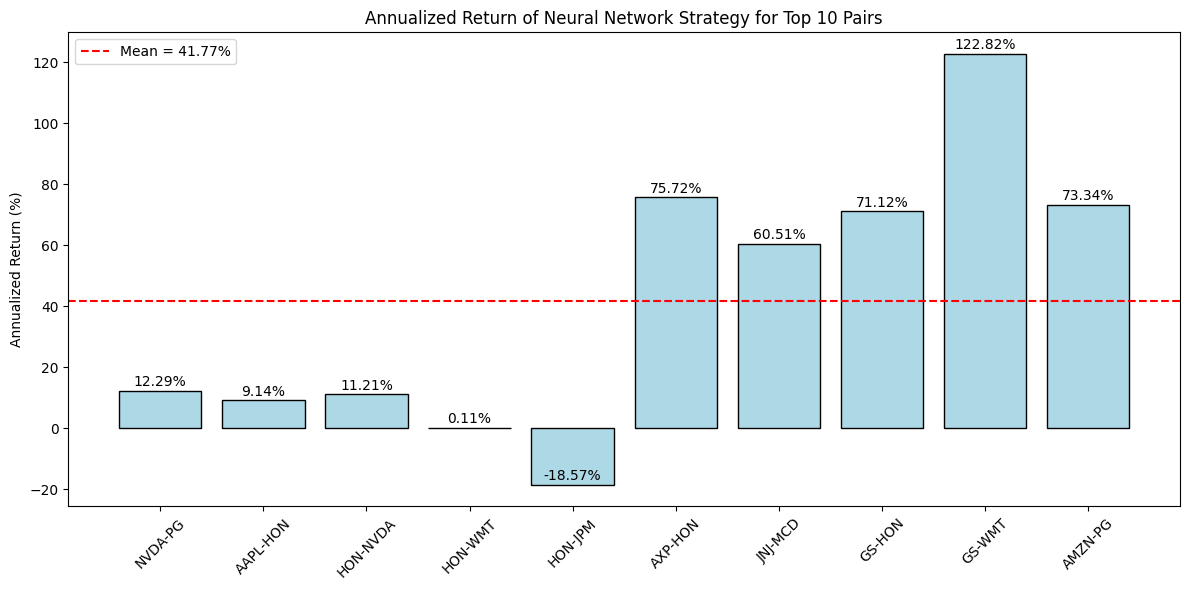

In [37]:
pairs = list(nn_strategy_returns.keys())
returns = list(nn_strategy_returns.values())
pair_labels = [f"{p[0]}-{p[1]}" if isinstance(p, (list, tuple)) else str(p) for p in pairs]

mean_return = np.mean(returns)

plt.figure(figsize=(12, 6))
bars = plt.bar(pair_labels, returns, color='lightblue', edgecolor='black')
plt.axhline(mean_return, color='red', linestyle='--', label=f'Mean = {mean_return:.2f}%')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}%', ha='center', va='bottom')

plt.title('Annualized Return of Neural Network Strategy for Top 10 Pairs')
plt.ylabel('Annualized Return (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()